In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
#df = pd.read_csv('κατεβαστε το απο το φακελο table')
df.head(1)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,southern_europe,northern_europe,western_europe,central_eastern_europe,age,2018_q1,2018_q2,2018_q3,2018_q4,2019_q1,2019_q2,count_of_transactions,ammount_completed,count_completed,amount_reverted,count_reverted,amount_declined,count_declined,ammount_cancelled,count_cancelled,ammount_failed,count_failed,new,ammount_of_true_trans,count_of_true_trans,count_email,count_push,ammount/trans,FEES,CARD_PAYMENT,TRANSFER,TOPUP,EXCHANGE,REFUNDS,ATM
0,user_0,1992,southern_europe,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,1,0,0,0,28,0.0,0.0,5.321101,63.486239,14.311927,16.880734,545.0,6925.08,520.0,32.63,8.0,130.45,6.0,0.0,0.0,31.26,9.0,6892.45,6730.74,497.0,6,2,13.317462,0,335,23,158,5,1,0


In [216]:
df.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'brand', 'southern_europe',
       'northern_europe ', 'western_europe', 'central_eastern_europe', 'age',
       '2018_q1', '2018_q2', '2018_q3', '2018_q4', '2019_q1', '2019_q2',
       'count_of_transactions', 'ammount_completed', 'count_completed',
       'amount_reverted', 'count_reverted', 'amount_declined',
       'count_declined', 'ammount_cancelled', 'count_cancelled',
       'ammount_failed', 'count_failed', 'new', 'ammount_of_true_trans',
       'count_of_true_trans', 'count_email', 'count_push', 'ammount/trans',
       'FEES', 'CARD_PAYMENT', 'TRANSFER', 'TOPUP', 'EXCHANGE', 'REFUNDS',
       'ATM'],
      dtype='object')

In [0]:
A= df.copy()
A.drop(['user_id','birth_year','country','city','created_date','num_referrals','num_successful_referrals',
        '2018_q1', '2018_q2', '2018_q3', '2018_q4', '2019_q1', '2019_q2',
        'count_of_transactions', 'count_completed','ammount_completed',
       'amount_reverted', 'count_reverted', 'amount_declined',
       'count_declined', 'ammount_cancelled', 'count_cancelled',
       'ammount_failed', 'count_failed', 'new',
       'count_of_true_trans',],axis=1,inplace=True)


X = A.drop('plan',axis=1)
y = A['plan']

In [0]:
X_trainG,X_testG,y_trainG,y_testG = train_test_split(X,y,test_size=0.3)
X_trainL,X_testL,y_trainL,y_testL = train_test_split(X,y,test_size=0.3)
X_trainS,X_testS,y_trainS,y_testS = train_test_split(X,y,test_size=0.3)
X_trainD,X_testD,y_trainD,y_testD = train_test_split(X,y,test_size=0.3)


**Gradient Boosting Classifier**




In [219]:
scG = StandardScaler()
varG = VarianceThreshold()
samplerG = SMOTE()
mdlG = GradientBoostingClassifier()




pipesG = Pipeline([('scaler', scG),
                  ('selector', varG),
                  ('sampler', samplerG),
                  ('model', mdlG)])

gridG = {'selector__threshold': [0.4],
         'model__learning_rate': [0.1],
         'model__n_estimators':[250]
         
         }

clfG= GridSearchCV(pipesG,gridG,cv=5)
clfG.fit(X_trainG, y_trainG)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [220]:
print(clfG.best_params_, '\n')

print(classification_report(y_testG, clfG.predict(X_testG)))

{'model__learning_rate': 0.1, 'model__n_estimators': 250, 'selector__threshold': 0.4} 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3723
           1       0.68      0.63      0.65       307

    accuracy                           0.95      4030
   macro avg       0.82      0.80      0.81      4030
weighted avg       0.95      0.95      0.95      4030



[[3632  114]
 [  91  193]]


Text(48.5, 0.5, 'Actual classes')

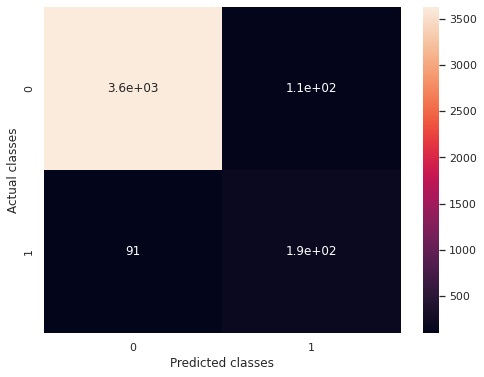

In [221]:
sns.set(rc={'figure.figsize':(8,6)})
cfmG = confusion_matrix(clfG.predict(X_testG), y_testG.values)
sns.heatmap(cfmG, annot=True)
print(cfmG)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Logistic Regression**

In [156]:
scL = StandardScaler()
varL = VarianceThreshold()
samplerL = SMOTE()
mdlL = LogisticRegression()




pipesL = Pipeline([('scaler', scL),
                  ('selector', varL),
                  ('sampler', samplerL),
                  ('model', mdlL)])

gridL = {'selector__threshold': [0.4],
         'model__penalty': ['l1','l2'],
          'model__C':[0.0,0.5,1.0,2.0]}
         
       

clfL= GridSearchCV(pipesL,gridL,cv=5)
clfL.fit(X_trainL, y_trainL)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [157]:
print(clfL.best_params_, '\n')

print(classification_report(y_testL, clfL.predict(X_testL)))

{'model__C': 2.0, 'model__penalty': 'l2', 'selector__threshold': 0.4} 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3714
           1       0.47      0.82      0.60       316

    accuracy                           0.91      4030
   macro avg       0.73      0.87      0.77      4030
weighted avg       0.94      0.91      0.92      4030



[[3424   58]
 [ 290  258]]


Text(48.5, 0.5, 'Actual classes')

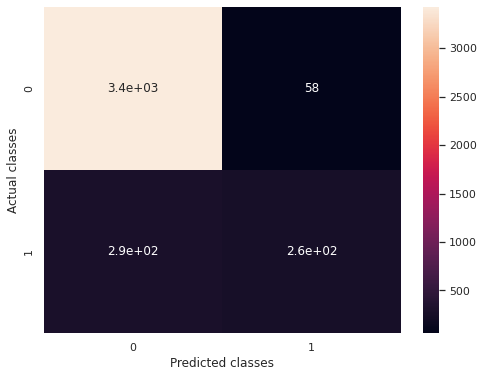

In [158]:
sns.set(rc={'figure.figsize':(8,6)})
cfmL = confusion_matrix(clfL.predict(X_testL), y_testL.values)
sns.heatmap(cfmL, annot=True)
print(cfmL)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Support Vector Machines**

In [159]:
scS = StandardScaler()
varS = VarianceThreshold()
smpS = SMOTE()
mdlS = svm.SVC()

pipeS= Pipeline ([('scaler',scS),
                  ('selector',varS),
                  ('sampler',smpS),
                  ('model',mdlS)])


gridS = {}

clfS= GridSearchCV(pipeS,gridS,cv=3)
clfS.fit(X_trainS,y_trainS)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                        SVC(C

In [160]:
print(clfS.best_params_, '\n')

print(classification_report(y_testS, clfS.predict(X_testS)))

{} 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3705
           1       0.49      0.75      0.59       325

    accuracy                           0.92      4030
   macro avg       0.73      0.84      0.77      4030
weighted avg       0.94      0.92      0.92      4030



[[3450   80]
 [ 255  245]]


Text(48.5, 0.5, 'Actual classes')

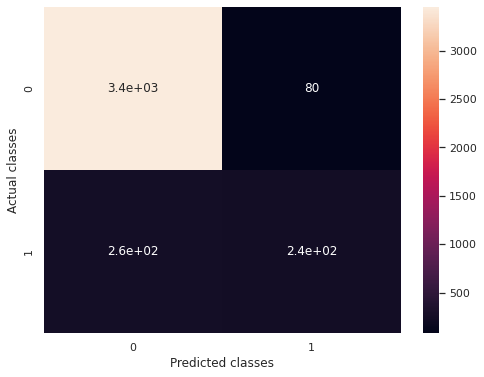

In [161]:
sns.set(rc={'figure.figsize':(8,6)})
cfmS = confusion_matrix(clfS.predict(X_testS), y_testS.values)
sns.heatmap(cfmS, annot=True)
print(cfmS)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Decision Tree Classifier**

In [162]:

scD = StandardScaler()
varD = VarianceThreshold()
samplerD = SMOTE()
mdlD = DecisionTreeClassifier()




pipesD = Pipeline([('scaler', scD),
                  ('selector', varD),
                  ('sampler', samplerD),
                  ('model', mdlD)])

gridD = {'selector__threshold': [0, 0.2, 0.4],
         'model__criterion': ['gini', 'splitter'],
         'model__max_depth':[10,100,1000,2000]
         
         }

clfD= GridSearchCV(pipesD,gridD,cv=5)
clfD.fit(X_trainD, y_trainD)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [163]:
print(clfD.best_params_, '\n')

print(classification_report(y_testD, clfD.predict(X_testD)))

{'model__criterion': 'gini', 'model__max_depth': 10, 'selector__threshold': 0.4} 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3704
           1       0.51      0.70      0.59       326

    accuracy                           0.92      4030
   macro avg       0.74      0.82      0.77      4030
weighted avg       0.93      0.92      0.93      4030



[[3484   99]
 [ 220  227]]


Text(48.5, 0.5, 'Actual classes')

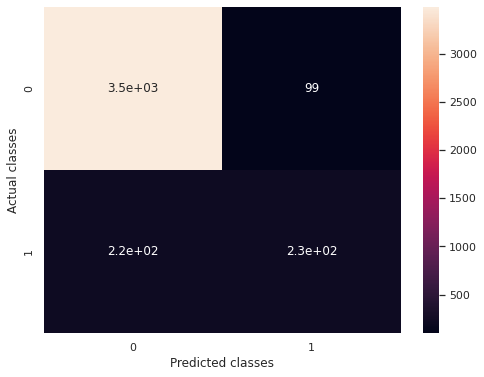

In [164]:
sns.set(rc={'figure.figsize':(8,6)})
cfmD = confusion_matrix(clfD.predict(X_testD), y_testD.values)
sns.heatmap(cfmD, annot=True)
print(cfmD)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

<b>Pre-Scale | Scaled</b>

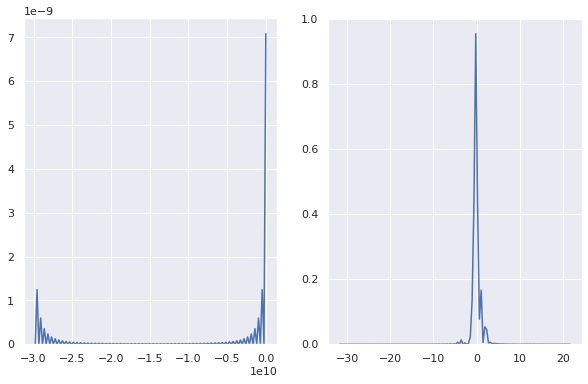

In [222]:
plt.figure(figsize=(10,6))

ax=plt.subplot(121)

sns.distplot((X_trainG.iloc[:1000,:]),hist=False)

ax=plt.subplot(122)

sns.distplot(scG.fit_transform(X_trainG.iloc[:1000,:]),hist=False)


